# Orientation to Python

Chem 6004
January 18, 2019

This will introduce some of the basic concepts required for scientific computing in python.
In particular, the following concepts will be illustrated:


- Basic use of numpy 
- Basic use of matplotlib
- Arrays
- Loops
- Timing
- Functions

We will start with the illustrative example discussed in class, namely, the kinetic energy 
and potential energy of a collection or $N$ charged particle.

\begin{equation}
T = \sum_{i=1}^N \frac{1}{2} m_i v_i^2.
\end{equation}

A natural way to store the masses and velocities of the particles is in an array.  The following lines of code 
will import numpy and create two numpy arrays that can be used to store the masses and velocities of $N=10$ particles


In [1]:

import numpy as np
import time
### Number of particles will be 10
Npart_array = [10, 20, 30, 40, 50]
  for i in range(0,len(Npart_array)):
        m = np.zeros()
### create an array 'm' and 'v' to store the masses and velocities of the 10 particles... 
### initially, each entry in 'm' and 'v' will be zero, and we will have to assign values later
m = np.zeros(Npart)
v = np.zeros(Npart)

We can use a for loop to access all the entries in 'm' and 'v' and assign them values.  For simplicity,
we will give each particle the same mass (1.0 in natural units of mass) and the same velocity (2.5 in natural
units of velocity).

In [2]:
for i in range(0,Npart):
    m[i] = 1.0
    v[i] = 2.5

### Now that values have been assigned, print to confirm they are what you expect
print("Printing array of masses: ",m)
print("Printing array of velocities: ",v)

Printing array of masses:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Printing array of velocities:  [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5]


Finally, we can perform arithmetic operations directly with the arrays to create a new array of kinetic
energies of each particle.  The following line will compute 
\begin{equation}
T_i = \frac{1}{2} m_i v_i^2.
\end{equation}
for each particle indexed by $i$.


In [5]:
start = time.time()
T = 1/2 * m * v**2
T_tot = np.sum(T)
end = time.time()
print(end-start)
### confirm that T is indeed an array with an entry for the kinetic energy of each particle
print(T)

0.0001289844512939453
[3.125 3.125 3.125 3.125 3.125 3.125 3.125 3.125 3.125 3.125]


We can compute the total kinetic energy by summing up the entries within T.  This can be done using another
for loop, but it can also be done making use of a numpy function called 'sum'.  We will use both to confirm they give 
the same result.

In [ ]:
### initialize a sum variable to zero
T_tot_loop = 0.

### loop over elements of the T array and 
### compute the sum 
for i in range(0,Npart):
    ### add elements to the sum variable
    T_tot_loop = T_tot_loop + T[i]
    
### compute the sum using np.sum instead
T_tot_sum = np.sum(T)

### print both sums to confirm both methods give the same answer
print("Result from loop is ",T_tot_loop)
print("Result from numpy sum is ",T_tot_sum)

Next let's consider the potential energy:
\begin{equation}
V_i = \sum_{j \neq i}^N \frac{q_i q_j}{r_{ij}}. 
\end{equation}
Again for simplicity, we will consider the particles to be in 1 dimension, so we can write the separation simply as
\begin{equation}
r_{ij} = \sqrt{(x_i - x_j)^2}
\end{equation}
where $x_i$ indicates the position of particle $i$ and $x_j$ the position of particle $j$.
The total potential energy will be a sum over the potential energy for each individual particle, so we can 
see we need to compute two nested sums to get the total potential energy:
\begin{equation}
V = \sum_{i=1}^N \sum_{j \neq i}^N \frac{q_i q_j}{ r_{ij}}. 
\end{equation}

We can see we need a few more quantities to compute this sum: we will need the charge for each particle,
and we will need the separation between each particle pair, which of course means we need the positions
of all the particles.  We can store the charges and positions as simples 1-D arrays again, but to store
the separations between particle pairs, it is more natural to store them in a 2-D array.  Once again for simplicity, 
we will assign each particle a charge of 1 natural unit and we will space each particle evenly along the $x$-axis with an interparticle separation of 0.2 natural units of length.  By the way, we will also assume $\frac{1}{4 \pi \epsilon_0} = 1$ in our natural unit system. 


In [ ]:
### create 1-D arrays of length Npart for q... assign each particle charge of 1 natural unit
q = np.ones(Npart)

### create a 1-D array of length Npart for x... use np.linspace to automatically
### assign values since we want the particles evenly spaced.
x = np.linspace(0,(Npart-1)*0.2,Npart)

### create a 2-D array that is Npart x Npart for the separations between particle pairs
r = np.zeros((Npart,Npart))

### compute all separations using two nested for-loops to access the positions of each particle
for i in range(0,Npart):
    for j in range(0,Npart):
        r[i][j] = np.sqrt( (x[i]-x[j])**2 )

### now print all arrays 
print("Printing array of charges ",q)
print("Printing array of charges ",x)
print("Printing array of charges \n",r)



We could write a few more nested for loops to compute the potential energy for us,
but it is worth using this opportunity to illustrate one more useful concept, which is the concept of a 
function.  If one were simulating a material, one might want to compute the potential energy many times during
the simulation as the positions of the particles change... it would be silly to have to write a new set of nested for loops every time you wanted your simulation to do this, so you can package the calculation into something called a function that can be called whenever you want to calculate the potential energy.

In [ ]:
### function to compute potential energy given an array of separations and an array of charges
def Potential(sep_array, charge_array):
    ### presumably the number of particles is equal to the length
    ### of the array of charges
    N = len(charge_array)
    
    ### initialize the potential energy to zer
    Pot = 0.
    ### nested loop
    for i in range(0,N):
        for j in range(0,N):
            ### do not calculate potential of particle with itself!
            if (i!=j):
                Pot = Pot + charge_array[i]*charge_array[j]/sep_array[i][j]
    return Pot
            

Now we can simply call our $Potential$ function and pass it $r$ and $q$ as arguments, and it will return the total potential energy for us!

In [ ]:
### Compute total potential energy and store it as the variable V_tot
V_tot = Potential(r, q)

### print it to see what it is!
print(V_tot)

# Questions!
- How does the total kinetic energy of a collection of $N$ particles grow with $N$ assuming each particle has the same average kinetic energy?  Compute the total kinetic energy for five different values of $N$ and plot the results using $pyplot$ (a sample program using $pyplot$ can be found below)
- How does the total potential energy of a collection of $N$ equally spaced charged particles grow with $N$?  Compute the the total potential energy for five different values of $N$ and plot the results.
- Use the $time$ library in python to determine how the time required to compute the kinetic and potential energy for the five different values of $N$; plot the time required vs $N$ and discuss if the kinetic seems to scale linearly and the potential seems to scale quadratically with $N$.

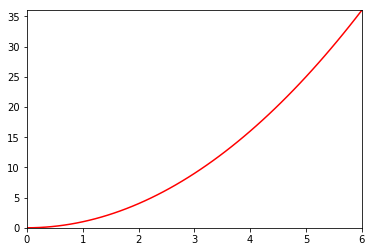

 Total time to run in seconds is:  0.15700626373291016


In [15]:
'''
Example of the use of the time and pyplot libraries in python... we will do things:
(1) Create an array of x values and an array of y values and use pyplot to plot them
(2) Measure the time taken to run the entire program
'''
### import time library
import time
### import pyplot as library
from matplotlib import pyplot as plt

### get the time at the beginning of the program
start = time.time()
### create an array of 100 x-values between -5 and 5
x = np.linspace(-5,6,100)
### create an array of y-values defined as y = x^2
y = x**2

### plot y = x^2 with a red line!
plt.plot(x, y, 'red')
plt.xlim(0,6)
plt.ylim(0,36)
plt.show()

### figure out how much time this whole program took to run!
end = time.time()
how_long = end - start
### print the total time taken in seconds
print(" Total time to run in seconds is: ",how_long)

